## Introduction

This project will investigate if there is a correlation between the GDP of a country and Life Expectancy at Birth of its citizens. 
The goals here are to prepare the data, followed by analysis with plots, and seek to explain the findings in the study.
Here are a few questions that this study will seek to answer:
* Has life expectancy increased over time in the studied countries?
* Has GDP increased over time in the studied countries?
* Is there a correlation between GDP and Life Expectancy of a country?
* What is the average life expectancy in the studied countries?
* What is the distribution of life expectancy?

**Data Source:**

- [Codecademy](https://www.codecademy.com/)'s Data Analyst Career Path

## Import Python Modules

First import the preliminary modules to be used in this project:

In [1]:
# import libriaries
# import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline 

## Loading the Data

To look for connections between GDP and Life Expectancy, we grab the data and load it in a DataFrame for visualization.

In our case, we save **all_data.csv** in a frame named `df`, which data we check by using `sample` to get a random sample of 10 rows.   

In [2]:
# render the dataframe
df = pd.read_csv('all_data.csv')
df.sample(10)

,Country,Year,Life expectancy at birth (years),GDP
81,Zimbabwe,2001,45.3,6.777385e+09
68,United States of America,2004,77.5,1.230000e+13
45,Germany,2013,80.6,3.752510e+12
21,China,2005,73.9,2.285970e+12
88,Zimbabwe,2008,48.2,4.415703e+09
25,China,2009,74.9,5.109950e+12
58,Mexico,2010,75.6,1.051130e+12
10,Chile,2010,79.1,2.185380e+11
83,Zimbabwe,2003,44.5,5.727592e+09
95,Zimbabwe,2015,60.7,1.630467e+10


Then we perform another check, that of the shape of `df`. As it seems, that there are 96 observations or rows and 4 columns in our `df`. 

In [3]:
df.shape

(96, 4)

## Explore the Data

First, we explore which are the countries represented in `df`. There seems to be six countries, Chile, China, Germany, Mexico, the US, and Zimbabwe represented in the data.

In [4]:
# check for unique values in Country
df.Country.unique()

array(['Chile', 'China', 'Germany', 'Mexico', 'United States of America',
       'Zimbabwe'], dtype=object)

As a next step, we find out of which years is data represented, and they are 2000-2015.

In [5]:
df.Year.unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015], dtype=int64)

#### Cleaning Column Name

Looking at the data, we find inconsistencies with the column names. For example, the first two column names are one word each, while the third is five words long! `Life expectancy at birth (years)` being very descriptive and difficult to work on with. By using the `rename` function, we change the column name to `Life_Exp`.

In [6]:
# renaming the Life Expectancy column for ease of use.
df = df.rename(columns={'Life expectancy at birth (years)':'Life_Exp'})
df.head()

,Country,Year,Life_Exp,GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


#### Exploratory Plots

Following we explore the data with plots. We examine `GDP` distribution, where data appear to be very right skewed. 

<Figure size 800x600 with 0 Axes>

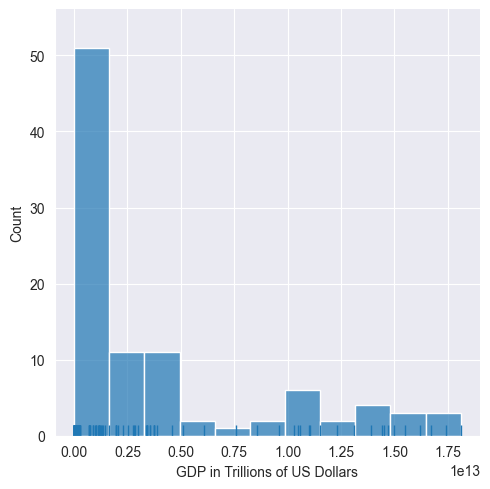

In [62]:
plt.figure(figsize=(8,6))
sns.displot(df.GDP, rug=True, kind='hist', alpha=0.7)
plt.xlabel('GDP in Trillions of US Dollars')
plt.show()
plt.close()

Next we examine `Life_Exp` column's distribution, where data appear to bebeing very left skewed. A further look here might also identify different modes or smaller groupings of distributions within the range.

<Figure size 800x600 with 0 Axes>

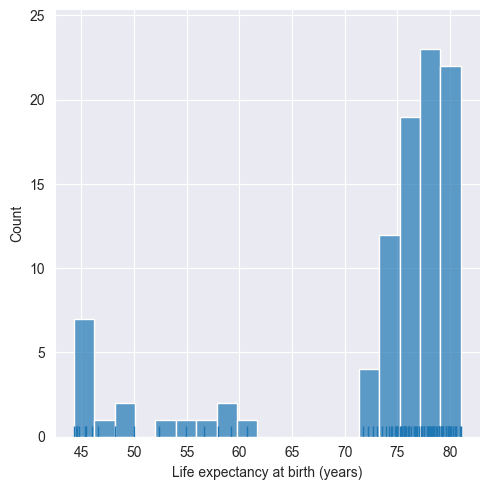

In [66]:
plt.figure(1, figsize=(8,6))
sns.displot(df.Life_Exp, rug=True, kind='hist', alpha=0.7)
plt.xlabel('Life expectancy at birth (years)')
plt.show()
plt.close();

Following we break data by countries and then plot GDP and Life Exp mean by country.  

In [23]:
dfMean = df.drop('Year', axis=1).groupby('Country').mean().reset_index()
dfMean

,Country,Life_Exp,GDP
0,Chile,78.94375,1.697888e+11
1,China,74.26250,4.957714e+12
2,Germany,79.65625,3.094776e+12
3,Mexico,75.71875,9.766506e+11
4,United States of America,78.06250,1.407500e+13
5,Zimbabwe,50.09375,9.062580e+09


After breaking `Country` and average values for `Life_Exp` and `GDP` are generated, we create the bar plots showing the mean values for each variable. 

The first plot is Life Expectancy.

All countries except for Zimbabwe have average values in the mid-to-high 70s. This probably explains the skew in the distribution from before!

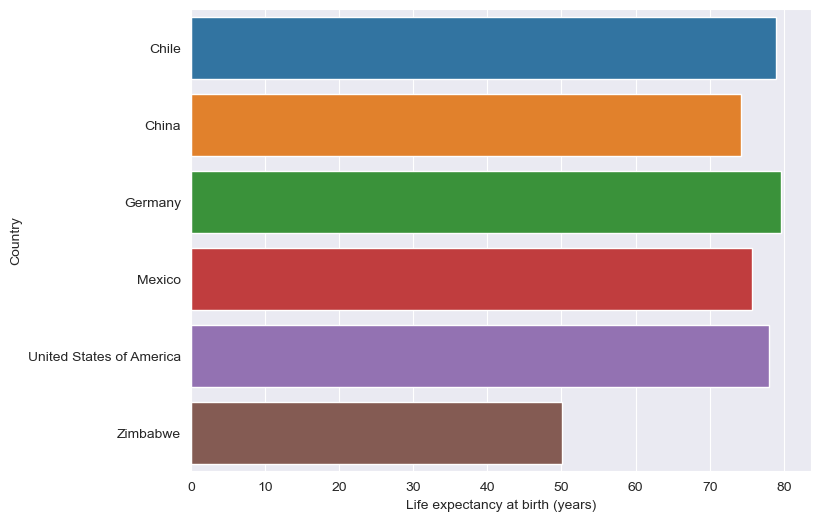

In [38]:
plt.figure(figsize=(8,6))
sns.barplot(data=dfMean, x='Life_Exp', y='Country')
plt.xlabel('Life expectancy at birth (years)')
plt.show()
plt.close()

By plotting average `GDP` by `Country`, it seems that the value for US is highest among other countries, followed by China and Germany. If we'd plot the data scaled linearly (shown in logarithmic scale instead) on the X axes, Zimbabwe will not even be visible while Chile would be barely seen. In comparison the USA has a much greater GDP compared to the rest. China, Germany and Mexico seem to be relatively close in figures.

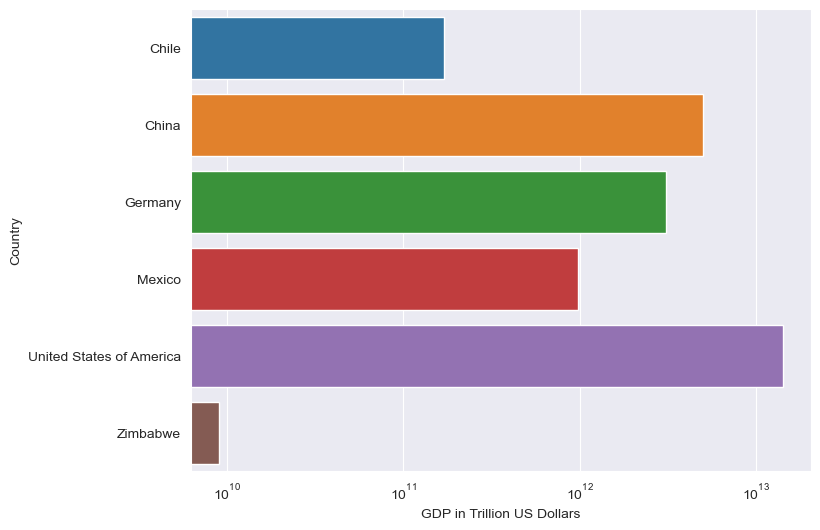

In [51]:
plt.figure(figsize=(8,6))
sns.barplot(data=dfMean, x='GDP', y='Country')
plt.xlabel('GDP in Trillion US Dollars')
plt.xscale('log') #'linear', 'log',
plt.show()
plt.close()


#### Violin Plots

Another way to compare data is to visualize the distributions of each parameter and look for patterns in the shapes.

The violin plot shows the shape of the distribution compared to the box plot. In the following figure both plots share the `Country` on the y-axes, while and the distribution of numeric columns: `GDP` and `Life_Exp` are shown on the x-axis. 

In the `GDP` plot on the left, China and the US have a relatively wide range, where Zimbabwe, Chile, and Mexico have shorter ranges. 

In the `Life_Exp` plot, many of the countries have shorter ranges except for Zimbabwe which has a range spanning from the high 30s to the high 60s.

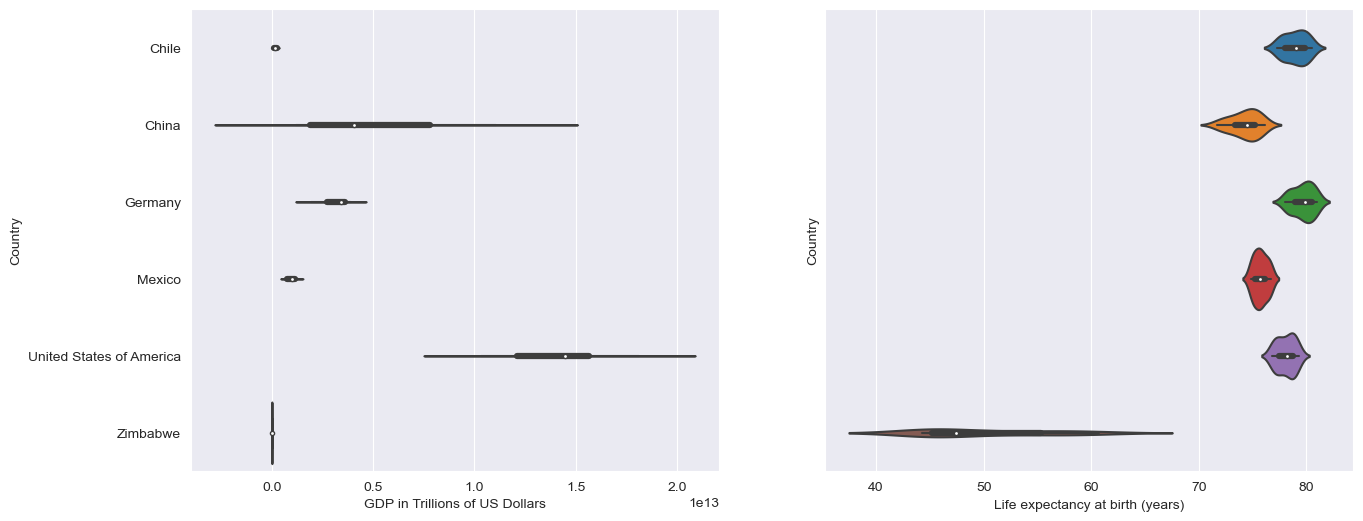

In [55]:
fig, axes = plt.subplots(1, 2, figsize=(15,6), sharey=True)
axes[0] = sns.violinplot(ax=axes[0], x=df.GDP, y=df.Country)
axes[0].set_xlabel('GDP in Trillions of US Dollars') 
axes[1] = sns.violinplot(ax=axes[1], x=df.Life_Exp, y=df.Country)
axes[1].set_xlabel('Life expectancy at birth (years)')
plt.show()
plt.close()

#### Swarm Plots

Another method to show distributions is the swarm plot, used to complement the box and violin plots. First we show the stand alone swarm plot and then we show the second version, overlayed on top of a violin plot. Swarm plots are useful because they show dot density around the values as well as distribution through area/shape. 

In the case of the `GDP` plot on the left, Chile and Zimbabwe have a vertical line of dots that illustrate the number of data points that fall around their values. This means that GDP values for this countries change in rather smaller fractions of trillions of US Dollars, hence harder to be visualized without implementing logarithm scaling.  

c:\Python311\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 43.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


c:\Python311\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 43.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Python311\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 56.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


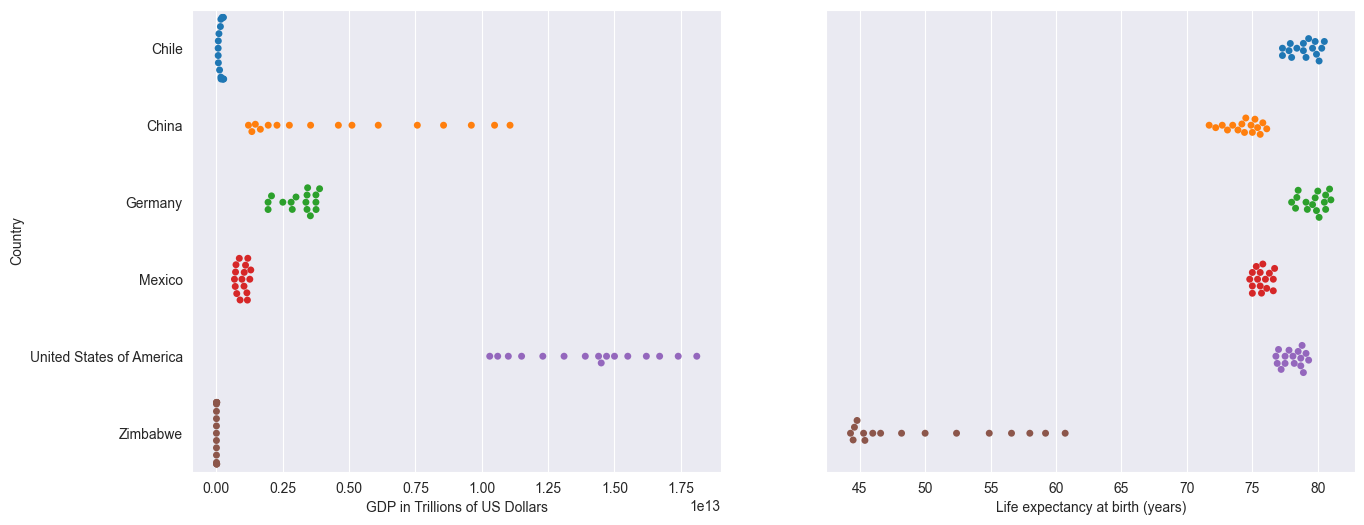

In [69]:
fig, axes = plt.subplots(1, 2, figsize=(15,6), sharey=True)
axes[0] = sns.swarmplot(ax=axes[0], x=df.GDP, y=df.Country, hue=df.Country)
axes[0].set_xlabel('GDP in Trillions of US Dollars') 
axes[1] = sns.swarmplot(ax=axes[1], x=df.Life_Exp, y=df.Country, hue=df.Country)
axes[1].set_xlabel('Life expectancy at birth (years)')
plt.show()
plt.close();

c:\Python311\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 43.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Python311\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 56.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Python311\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 6.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Python311\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 43.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


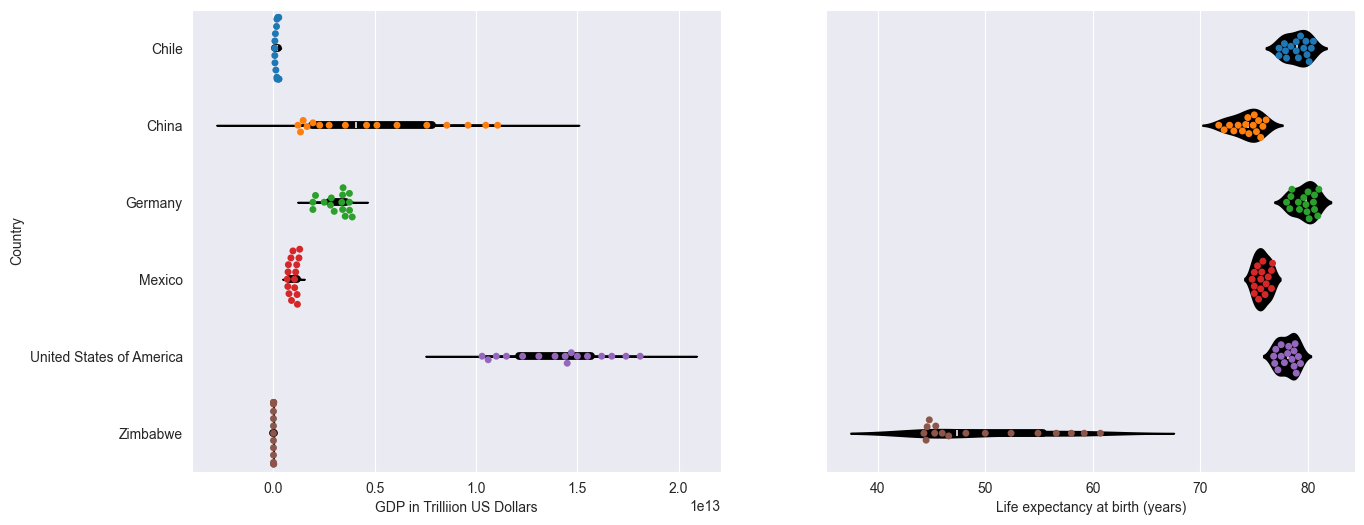

In [71]:
fig, axes = plt.subplots(1,2, sharey=True, figsize=(15,6))
axes[0]=sns.violinplot(ax=axes[0], x=df.GDP, y=df.Country, color='black')
axes[0]=sns.swarmplot(ax=axes[0], x=df.GDP, y=df.Country, hue=df.Country)
axes[0].set_xlabel('GDP in Trilliion US Dollars')
axes[1]=sns.violinplot(ax=axes[1], x=df.Life_Exp, y=df.Country, color='black')
axes[1]=sns.swarmplot(ax=axes[1], x=df.Life_Exp, y=df.Country, hue=df.Country)
axes[1].set_xlabel('Life expectancy at birth (years)')
plt.show()
plt.close()

#### Line Charts

Next we explore `GDP` and `Life_Exp` data over the years, through line charts. 
we separate the countries colors and we see that the US and China have increased substantially between 2000-2015. China seems to have grouwn at a faster pace, as it went from less than a quarter trillion dollars to ove one trillion dollars in the time span. The rest of the countries did not see increases in this magnitude.

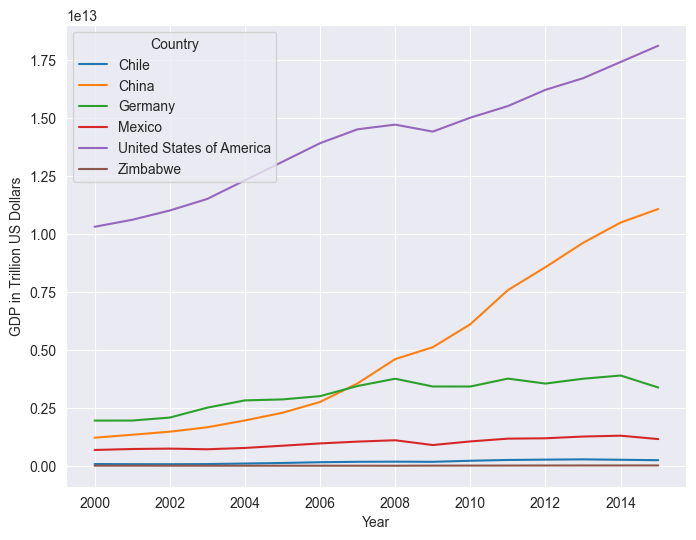

In [37]:
plt.figure(figsize=(8,6))
sns.lineplot(data=df, x='Year', y='GDP', hue='Country')
plt.ylabel('GDP in Trillion US Dollars')
plt.show()
plt.close()


##### Faceted Charts

Another aspect that we look more into depth is the faceted line charts by Country. In the individual plots, each country has their own y-axis, which makes it easier to compare the shape of their `GDP` over the years without having the same scale. 

In the chart above, the other country's GDP growth looked modest compared to China and the US, but all of the countries did experience growth from the year 2000. By using the faceted line charts we make it easier to see that all of the countries have seen increases. 

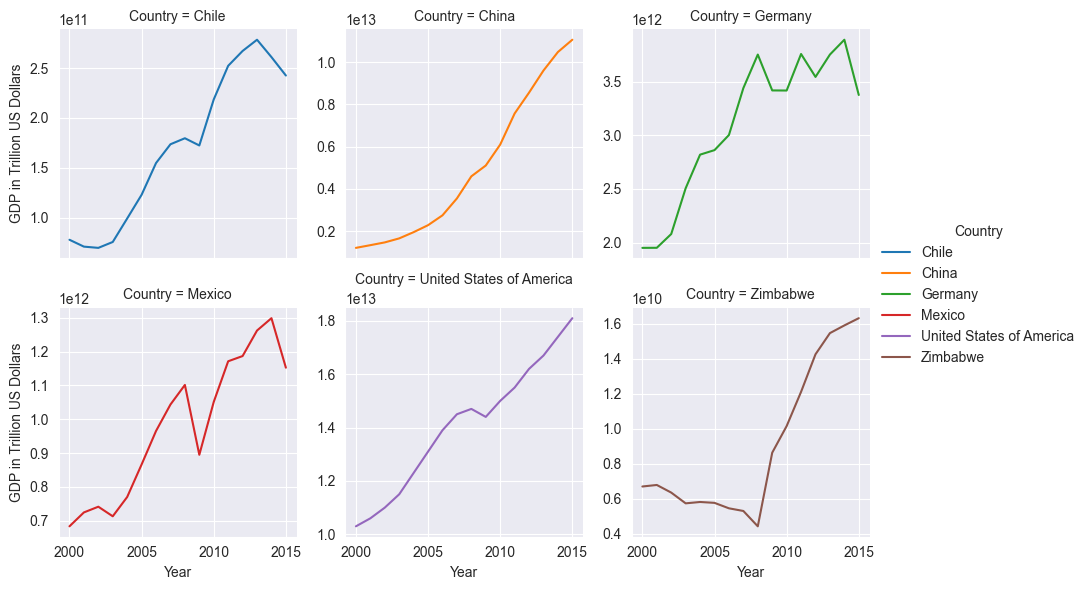

In [38]:
graphGDP = sns.FacetGrid(df, col='Country', col_wrap=3, hue='Country', sharey=False)
graphGDP = (graphGDP.map(sns.lineplot, 'Year', 'GDP')
            .add_legend()
            .set_axis_labels('Year', 'GDP in Trillion US Dollars'))
graphGDP

The following chart looks at life expectancy over the years, showing that every country has been increasing their life expectancy, but Zimbabwe has seen the greatest increase after a bit of a dip around 2004.

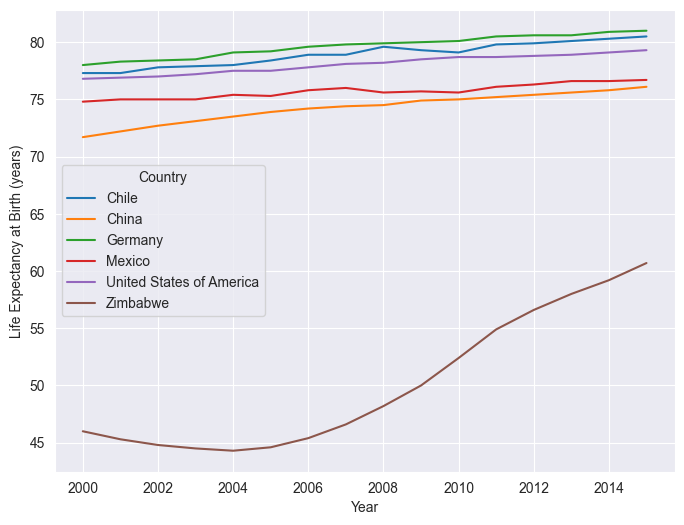

In [72]:
plt.figure(figsize=(8,6))
sns.lineplot(df, x='Year', y='Life_Exp', hue='Country')
plt.ylabel('Life Expectancy at Birth (years)')
plt.show()
plt.close()

The plot below breaks out life expectancy by country. 

It is apparent that Chile, and Mexico seemed to have dips in their life expectancy around the same time, which could be looked into further. Since in this type of plotting y-axis is not shared among the countries, nuances come in evidence showing that the seemingly linear changes in reality are not as smooth for some of the countries.

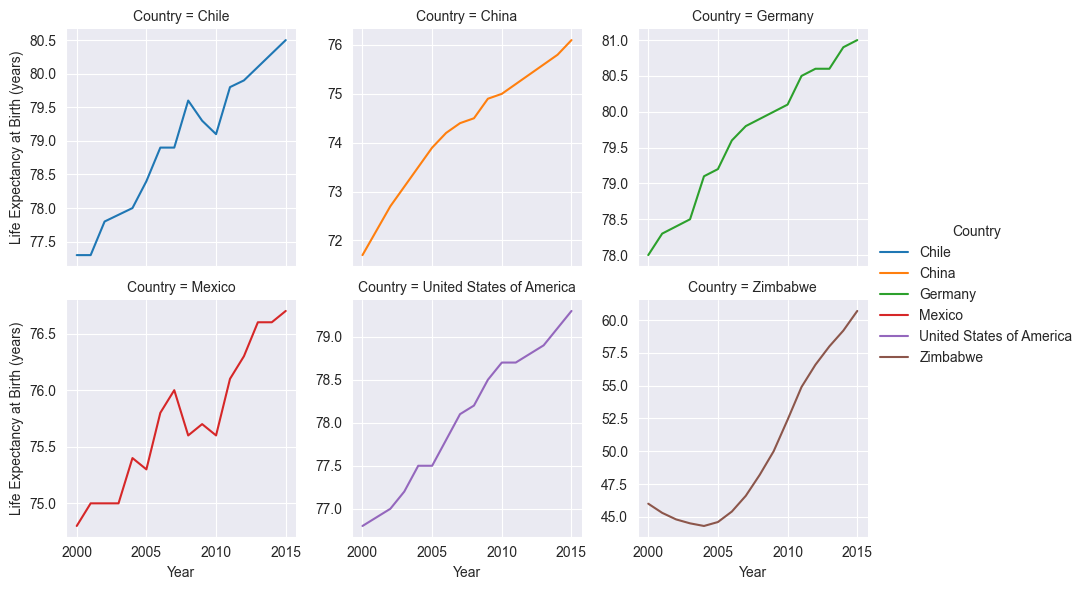

In [73]:
graphLE = sns.FacetGrid(df, col='Country', col_wrap=3, hue='Country', sharey=False)
graphLE = (graphLE.map(sns.lineplot, 'Year', 'Life_Exp')
            .add_legend().set_axis_labels('Year', 'Life Expectancy at Birth (years)'))
graphLE;

#### Scatter Plot

The next two charts explore the relationship between `GDP` and `Life_Exp`. 

In the first chart, it looks like GDP for Zimbabwe is staying flat, while their life expectancy is going up. For the other countries they seem to exhibit a rise in life expectancy as GDP goes up. The US and China seem to have very similar slopes in their relationship between GDP and life expectancy.

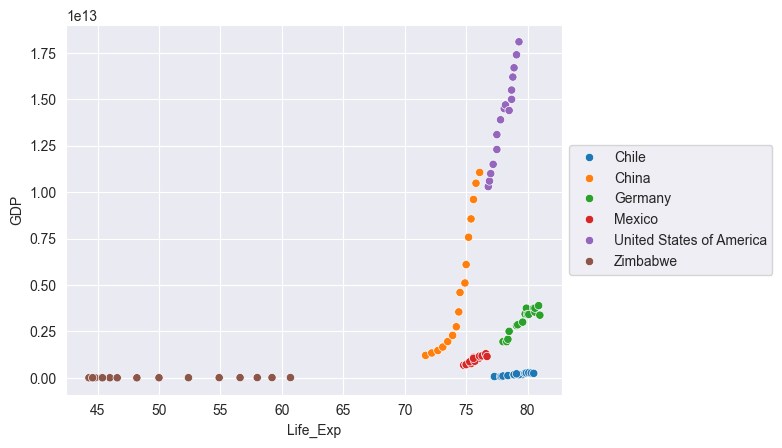

In [55]:
sns.scatterplot(df, x='Life_Exp', y='GDP', hue='Country').legend(loc='center left', bbox_to_anchor=(1, .5), ncol=1)
plt.show()
plt.close()

Like in the previous plots, countries are broken out into each scatter plot by facets. Looking at the individual countries, most countries like the US, Mexico and Zimbabwe have linear relationships between GDP and life expectancy. China on the other hand has a slightly exponential curve, and Chile's looks a bit logarithmic. In general though one can see an increase in GDP and life expectancy, exhibiting a positive correlation.

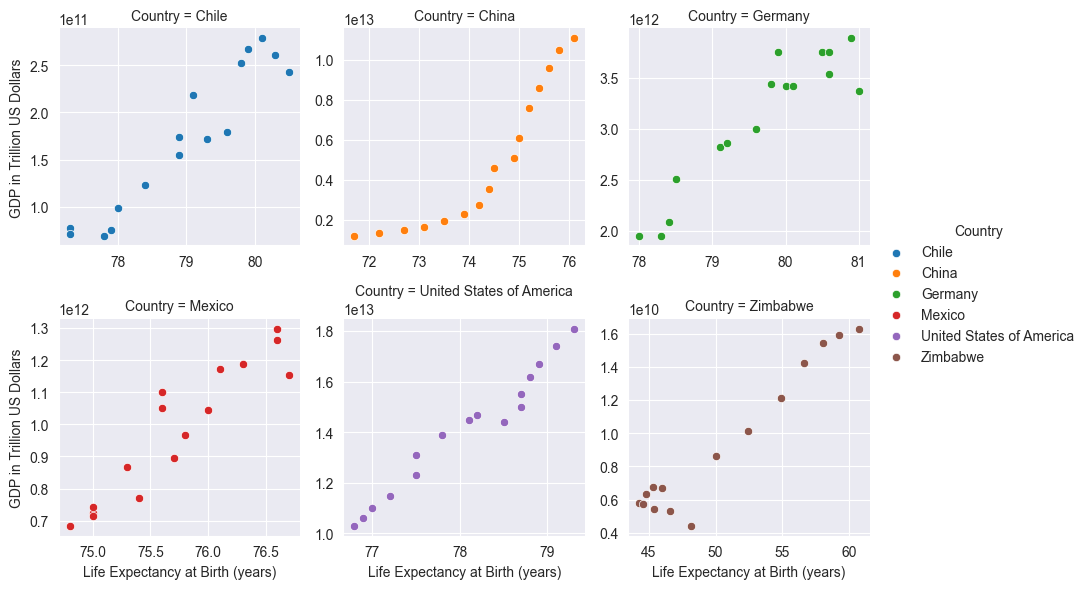

In [59]:
graph = sns.FacetGrid(df, col='Country', col_wrap=3, hue='Country', sharex=False, sharey=False)
graph = (graph.map(sns.scatterplot, 'Life_Exp', 'GDP')
         .add_legend().set_axis_labels('Life Expectancy at Birth (years)', 'GDP in Trillion US Dollars'))
graph;

## Conclusions

This project was able to answer some of the questions posed in the beginning:

- Has life expectancy increased over time in the studied countries?
    - Yes, with Zimbabwe having the greatest increase.
- Has GDP increased over time in the studied countries?
    - GDP has also increased for all countries in our list, especially for China.
- Is there a correlation between GDP and life expectancy of a country?
    - Yes there is a positive correlation between GDP and life expectancy for countries in our list.
- What is the average life expectancy in the studied countries?
    - Average life expectancy was between mid to high 70s for the countries except for Zimbabwe which was 50.
- What is the distribution of life expectancy?
    - the life expectancy had a left skew, or most of the observations were on the right side.

## Further Research

The study wanted to explore what happened in China in the past 10 years that caused the GDP to increase so drastically.

This [Forbes article](https://www.forbes.com/sites/peterpham/2018/03/06/is-there-a-secret-growth-hormone-added-to-chinas-economy/#40869ba53f13) describes China's unmatched GDP growth in the past decades were due to it's large population, newly available capital and manufacturing efficiency. The study can ascertain that the findings in the data matches the real world findings for GDP growth in China.

In [24]:
# df[df.Year.isin([2000, 2015])]

In [25]:
# # generate statistics for each country
# for i in range(df.Country.nunique()):
#     print(f"Statistics for {df.Country.unique()[i]}:")
#     # print(df[df.Country == df.Country.unique()[i]].describe())
#     # generate the change in % of GDP and Life Exp between 2015 and 2000
#     GDP_2015 = df[df.Country == df.Country.unique()[i]].GDP[df.Year == 2015].tolist()[0]
#     GDP_2000 = df[df.Country == df.Country.unique()[i]].GDP[df.Year == 2000].tolist()[0]
#     GDP_change = (GDP_2015 / GDP_2000) - 1
#     Life_Exp_2015 = df[df.Country == df.Country.unique()[i]].Life_Exp[df.Year == 2015].tolist()[0] 
#     Life_Exp_2000 = df[df.Country == df.Country.unique()[i]].Life_Exp[df.Year == 2000].tolist()[0] 
#     Life_Exp_change = (Life_Exp_2015 / Life_Exp_2000) - 1
#     print(f"GDP for {df.Country.unique()[i]} from 2000 to 2015 {'increased' if GDP_change > 0 else 'decreased'} by {(GDP_change * 100):.1f}%.") 
#     print(f"Life Expectancy for {df.Country.unique()[i]} from 2000 to 2015 {'increased' if Life_Exp_change > 0 else 'decreased'} by {(Life_Exp_change * 100):.1f}%.")
#     if i != df.Country.nunique()-1:
#         print('===========================')

In this analysis, latest values for Life_Exp and GDP are compared to respective ones at the starting period in order to generate change ratios. As shown in the reported analysis, both parameters have increased for all countries, obviously at different rates. 
In terms of GDP, China shows a significant growth rate at 813%, while Mexico seems to have grown the least with 69%.
In terms of Life Expectancy rates, Zimbabwe seems to have increased significantly, at 32%, while Mecxico still holds the least growing ratio in this category as well, but it is to say that all other countries are within 3%-6% increase rates. 

### Countries GDP by Year

In [26]:
# plot countries gpd by year
# plt.figure(figsize=(8,4)) 
# sns.lineplot(x='Year', y='GDP', data=df, hue='Country', lw=2)
# plt.yscale('log')
# plt.title("Countries GDP by Year");
# plt.show()
# plt.close()

The above plot shows that GDP is growing at higher rate in USA and China, where it has trippled over the years, and at a slower rate in other countries.

### Countries Life Expectancy by Year

In [27]:
# plot life expectancy by year
# plt.figure(figsize=(8,4)) 
# sns.lineplot(x='Year', y='Life_Exp', data=df, hue='Country', lw=2)
# plt.title("Countries Life Expectancy by Year")
# plt.show()
# plt.close()

As shown in the the above plot, its Germany who leads the Life Expectancy with numbers being above 80 yrs old, followed closely by Chile and USA. While quite all countries show for Life Expectancy to have increased over the years at a steady rate, it's Zimbabwe the one showing has the highest rate of increased life expectancy, however, quite far behind from the life expectancy numebers shown in other analysed countries.

### Life Expectancy to GDP Correlation

In [28]:
# plt.figure(figsize=(8,4))
# sns.scatterplot(x='Life_Exp', y='GDP', data=df, hue='Country'); 
# plt.yscale('log')
# plt.title('Life Exp to GDP Correlation')
# plt.show()
# plt.close()

As shon in the plote, while most countries with the exceptance of Zimbabwe show similar increasing pace in Life Expectancy, regarding GDP its China to have grwon faster than other countries since it has more than quadrippled in value, overpassing Germany and getting closer to USA. On the other hand, Zimbabwe shows a steep increase in Life Expectancy while a slower rate in GDP grwoth, due to its highly unstable economy affected also by hyperinflation.   

In [29]:
# df.groupby('Country')[['Life_Exp', 'GDP']].corr()

In addition to the above plot the shown frame points out the existance of a postive correlation between GDP and Life_Exp for all countries, with all of them having respective correlation coefficients quite close to 1. 

### Average Life Expectancy by Country

In [30]:
# generate and plot average life expetncy by country
# pivot_tab = df.pivot(index='Year', columns="Country", values='Life_Exp')
# sns.barplot(pivot_tab)
# plt.title("Avg. Life Expectancy by Country")
# plt.ylabel('Life Exp. (Yrs)')
# plt.xticks(rotation=15); 
# plt.show()
# plt.close()

# df.groupby("Country").Life_Exp.mean().rename('Avg_Life_Exp').to_frame()

This plot shows Germany having the highest average of Life Expecatancy of its population, while Zimbabwe standing on a lower average, mainly attributed to its political, social and economic instability faced by the country during the analysed period.

In [31]:
# sns.displot(data= df, y='Life_Exp', hue='Country', kind='ecdf', rug=True)
# sns.displot(data= df, x='Life_Exp', hue='Country', kind='hist', rug=True)
# plt.show()
# plt.close()

The above plots show Life Expectancy's proportionality of the population in each country during the analysed period. 

### Changes of GDP and Life_Exp data over the years

In [32]:
# create yearly fluctution colummns for GDP and life Exp
# df['GDP_Fluct'] = df.GDP.apply(lambda x: 0 if df.loc[df.GDP == x].index[0] in df.GDP[df.Year == 2000].index \
#                                else (x/df.GDP[(df[df.GDP == x].index[0])-1]-1)*100)
# df['Life_Exp_Fluct'] = df.Life_Exp.apply(lambda x: 0 if df.loc[df.Life_Exp == x].index[0] in df.Life_Exp[df.Year == 2000].index \
#                                          else (x/df.Life_Exp[(df[df.Life_Exp == x].index[0])-1]-1)*100)

# df.head()

Created a new colum for each parameter to make an evidence of respective yearly change and added them to the dataframe. 

In [33]:
# plt.figure(figsize=(8,4)) 
# sns.lineplot(data = df, x='Year', y='GDP_Fluct', hue='Country', lw=2);
# plt.title('Yearly GDP changes by country')
# plt.show()
# plt.close()


Plotted yearly GDP changes in % for each country. USA seems to have a steadier pace of growth, while other countries occilate, with Zimbabwe showing a steep increase in 2009 effected by currency revalution due to the hyperinflation occuring in the country at that period. 

In [34]:
# plt.figure(figsize=(8,4)) 
# sns.lineplot(data = df, x='Year', y='Life_Exp_Fluct', hue='Country',lw=2)
# plt.title('Yearly Life Expectancy changes by country')
# plt.show()
# plt.close()

Plotted yearly Life Expectancy changes in % for each country. Most countries seem to have valeus aroung their analysed period average, while Zimbabwe is the one to have changed the most. 